<a href="https://colab.research.google.com/github/aasthad01/GUI-Interface/blob/main/DataScience1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend
!pip install -U imbalanced-learn
!pip install rpy2

In [ ]:
# Importing Packages

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as tfk
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr

In [29]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving car-sales-extended-missing-data.csv to car-sales-extended-missing-data (1).csv


In [100]:
# Getting Data

dataset = pd.read_csv("car-sales-extended-missing-data.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
# Executing Commands

print(dataset.head)

<bound method NDFrame.head of        Make Colour  Odometer (KM)  Doors    Price
0     Honda  White            NaN    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2       NaN  White        84714.0    NaN      NaN
3    Toyota  White       154365.0    4.0      NaN
4    Nissan   Blue       181577.0    NaN  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
# Accessing Records and Variables

record=dataset.Price
print(record)
row_index = 5
row = dataset.iloc[row_index]
print(row)

0      15323.0
1      19943.0
2          NaN
3          NaN
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64
Make               Honda
Colour               Red
Odometer (KM)    42652.0
Doors                4.0
Price            23883.0
Name: 5, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
# Add an Index Field

dataset.set_index("Make", inplace = True)
print(dataset)

       Colour  Odometer (KM)  Doors    Price
Make                                        
Honda   White            NaN    4.0  15323.0
BMW      Blue       192714.0    5.0  19943.0
NaN     White        84714.0    NaN      NaN
Toyota  White       154365.0    4.0      NaN
Nissan   Blue       181577.0    NaN  14043.0
...       ...            ...    ...      ...
Toyota  Black        35820.0    4.0  32042.0
NaN     White       155144.0    3.0   5716.0
Nissan   Blue        66604.0    4.0  31570.0
Honda   White       215883.0    4.0   4001.0
Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
# Change Misleading Field Values

#df = dataset.dropna()
dataset['Colour'] = dataset['Colour'].replace('red', 'black')
dataset = dataset.fillna(dataset.apply(lambda x: np.random.choice(x.dropna()), axis=0))
print(dataset)

       Colour  Odometer (KM)  Doors    Price
Make                                        
Honda   White       218803.0    4.0  15323.0
BMW      Blue       192714.0    5.0  19943.0
NaN     White        84714.0    3.0   6200.0
Toyota  White       154365.0    4.0   6200.0
Nissan   Blue       181577.0    3.0  14043.0
...       ...            ...    ...      ...
Toyota  Black        35820.0    4.0  32042.0
NaN     White       155144.0    3.0   5716.0
Nissan   Blue        66604.0    4.0  31570.0
Honda   White       215883.0    4.0   4001.0
Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
# Reexpress Categorical Field Values

category_mapping = {'White' : 'WTE', 'Blue' : 'BLU', 'Black' : 'BLCK'}
dataset['Colour'] = dataset['Colour'].map(category_mapping)
print(dataset)

       Make Colour  Odometer (KM)  Doors    Price
0     Honda    WTE            NaN    4.0  15323.0
1       BMW    BLU       192714.0    5.0  19943.0
2       NaN    WTE        84714.0    NaN      NaN
3    Toyota    WTE       154365.0    4.0      NaN
4    Nissan    BLU       181577.0    NaN  14043.0
..      ...    ...            ...    ...      ...
995  Toyota   BLCK        35820.0    4.0  32042.0
996     NaN    WTE       155144.0    3.0   5716.0
997  Nissan    BLU        66604.0    4.0  31570.0
998   Honda    WTE       215883.0    4.0   4001.0
999  Toyota    BLU       248360.0    4.0  12732.0

[1000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
# Standardise Numeric Fields

d = pd.DataFrame(dataset)
d['Price'] = (d['Price'] - d['Price'].mean()) / d['Price'].std()
print(d['Price'])
print(dataset)

Make
Honda    -0.022963
BMW       0.512038
NaN      -1.079416
Toyota   -1.079416
Nissan   -0.171188
            ...   
Toyota    1.913115
NaN      -1.135464
Nissan    1.858457
Honda    -1.334062
Toyota   -0.323004
Name: Price, Length: 1000, dtype: float64
       Colour  Odometer (KM)  Doors     Price
Make                                         
Honda   White       218803.0   Four -0.022963
BMW      Blue       192714.0   Five  0.512038
NaN     White        84714.0  Three -1.079416
Toyota  White       154365.0   Four -1.079416
Nissan   Blue       181577.0  Three -0.171188
...       ...            ...    ...       ...
Toyota  Black        35820.0   Four  1.913115
NaN     White       155144.0  Three -1.135464
Nissan   Blue        66604.0   Four  1.858457
Honda   White       215883.0   Four -1.334062
Toyota   Blue       248360.0   Four -0.323004

[1000 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
# Identify Outliers

Q1 = dataset['Price'].quantile(0.25)
Q3 = dataset['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
outliers = dataset[(dataset['Price'] < lower_threshold) | (dataset['Price'] > upper_threshold)]
print(outliers)

     Colour  Odometer (KM)  Doors     Price
Make                                       
BMW   White        79937.0   Five  3.840507
BMW   Green       126441.0   Five  2.804319
BMW   White       218803.0   Five  2.617880
BMW    Blue        63321.0  Three  2.721290
BMW   White        23996.0   Five  3.788744
BMW    Blue        72575.0   Five  2.984506
BMW     Red       100060.0   Five  2.610005
BMW    Blue        69358.0   Five  3.675375
BMW    Blue        72663.0   Five  2.838365
BMW   White        96224.0  Three  3.497041
BMW   White        57905.0  Three  4.093185
BMW   White        83309.0   Five  3.472607
NaN   White        45513.0   Five  2.717006
BMW   White        84327.0   Five  2.630039
BMW   White        16274.0   Five  4.277309
BMW   White        85739.0   Five  3.809588


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-94-27b1eda9c4bf>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Make', y=column_to_plot, ci=None, palette='Set1')


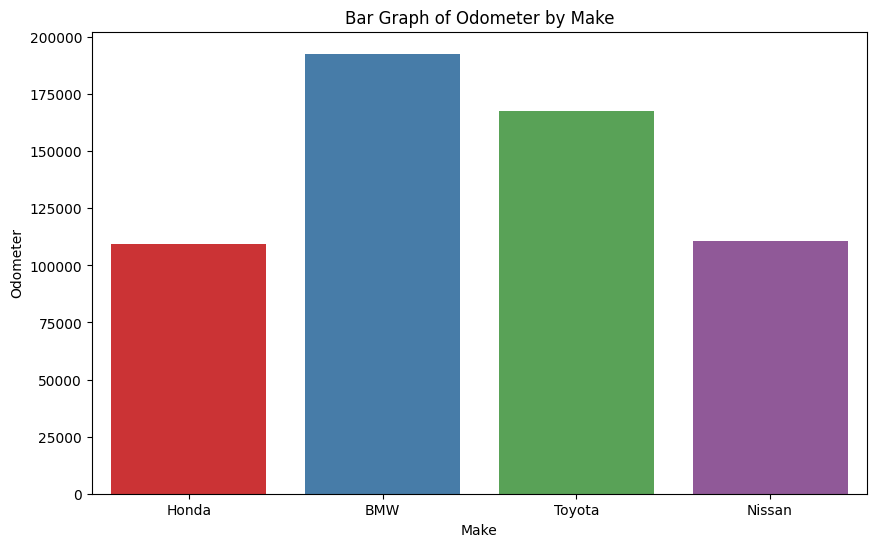

In [94]:
# Construct a Bar Graph with Overlay

#Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Make': ['Honda', 'BMW', 'Toyota', 'Nissan', 'Toyota', 'Honda', 'Toyota', 'Nissan', 'Honda', 'Toyota'],
    'Color': ['White', 'Blue', 'White', 'White', 'Blue', 'Black', 'White', 'Blue', 'White', 'Blue'],
    'Odometer': [76343.0, 192714.0, 84714.0, 154365.0, 181577.0, 35820.0, 155144.0, 66604.0, 215883.0, 248360.0],
    'Doors': [4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0],
    'Random': [-0.121441, 0.424357, 0.685678, 0.685678, -0.272657, 1.853708, -1.256392, 1.797946, -1.458998, -0.427536]
}

df = pd.DataFrame(data)
column_to_plot = 'Odometer'

#Create a bar graph with overlay
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Make', y=column_to_plot, ci=None, palette='Set1')

#Customize the plot
plt.title(f'Bar Graph of {column_to_plot} by Make')
plt.xlabel('Make')
plt.ylabel(column_to_plot)

#Show the plot
plt.show()


In [95]:
# Construct Contingency Tables

data_crosstab = pd.crosstab(dataset['Colour'], dataset['Doors'], margins = False)
print(data_crosstab)

Doors   Five  Four  Three
Colour                   
Black      5    81      9
Blue      20   238     44
Green     10   101     14
Red       12    65     11
White     28   325     37


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


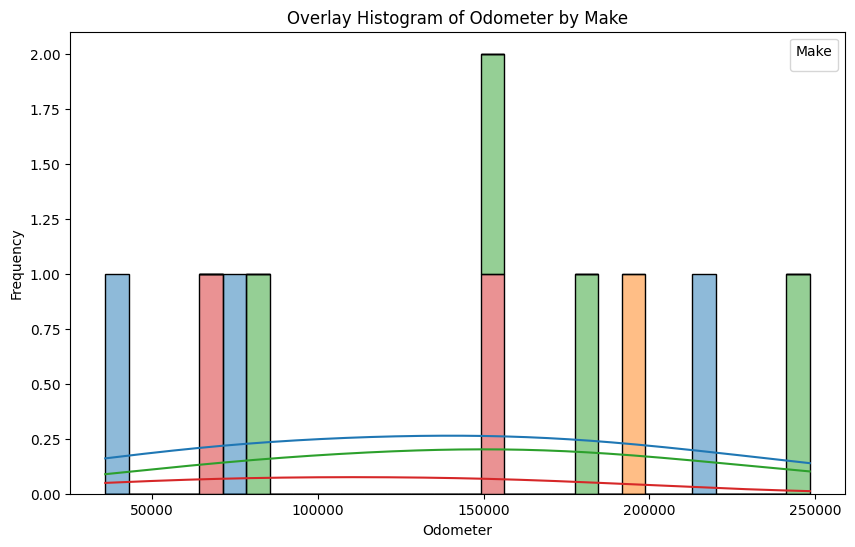

In [96]:
# Construct Histograms with Overlay

column_to_plot = 'Odometer'

#Convert column to numerical data type
df[column_to_plot] = pd.to_numeric(df[column_to_plot], errors='coerce')

#Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=column_to_plot, hue='Make', multiple='stack', bins=30, kde=True)

#Customize the plot
plt.title(f'Overlay Histogram of {column_to_plot} by Make')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.legend(title='Make')

#Show the plot
plt.show()


In [97]:
# Perform Binning Based on Predictive Value

data['new_bin'] = pd.qcut(data['Odometer'], q=3)
print(data)

{'Make': ['Honda', 'BMW', 'Toyota', 'Nissan', 'Toyota', 'Honda', 'Toyota', 'Nissan', 'Honda', 'Toyota'], 'Color': ['White', 'Blue', 'White', 'White', 'Blue', 'Black', 'White', 'Blue', 'White', 'Blue'], 'Odometer': [76343.0, 192714.0, 84714.0, 154365.0, 181577.0, 35820.0, 155144.0, 66604.0, 215883.0, 248360.0], 'Doors': [4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0], 'Random': [-0.121441, 0.424357, 0.685678, 0.685678, -0.272657, 1.853708, -1.256392, 1.797946, -1.458998, -0.427536], 'new_bin': [(35819.999, 84714.0], (181577.0, 248360.0], (35819.999, 84714.0], (84714.0, 181577.0], (84714.0, 181577.0], (35819.999, 84714.0], (84714.0, 181577.0], (35819.999, 84714.0], (181577.0, 248360.0], (181577.0, 248360.0]]
Categories (3, interval[float64, right]): [(35819.999, 84714.0] < (84714.0, 181577.0] <
                                           (181577.0, 248360.0]]}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
# Perform Model Evaluation

df = dataset.dropna()

#Define features and target variable
X = df[['Odometer (KM)', 'Doors']]
y = df['Price']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the performance of the regression model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Display the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 6481.68
Mean Squared Error: 65356076.78
R-squared: 0.22


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
# Accounting for Unequal Error Costs

df = dataset.dropna()

#Define features and target variable
X = df[['Odometer (KM)', 'Doors', 'Price']]
y = df['Doors']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the performance of the classification model with default threshold
print("Default Threshold:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Define unequal error costs
cost_false_positive = 1  # Cost of a false positive
cost_false_negative = 5  # Cost of a false negative

#Adjust the decision threshold based on error costs
decision_threshold = cost_false_negative / (cost_false_positive + cost_false_negative)
y_pred_adjusted = (model.predict_proba(X_test)[:, 1] > decision_threshold).astype(int)

#Evaluate the performance of the classification model with adjusted threshold
print("\nAdjusted Threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Default Threshold:
[[  0   9   0]
 [  0 111   0]
 [  0   8   0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         9
         4.0       0.87      1.00      0.93       111
         5.0       0.00      0.00      0.00         8

    accuracy                           0.87       128
   macro avg       0.29      0.33      0.31       128
weighted avg       0.75      0.87      0.81       128


Adjusted Threshold:
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 2  7  0  0  0]
 [59 52  0  0  0]
 [ 4  4  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       0.0
         3.0       0.00      0.00      0.00       9.0
         4.0       0.00      0.00      0.00     111.0
         5.0       0.00      0.00      0.00       8.0

    accuracy                           0.00     128.0
   macro avg       0.00      0.00      0.00     128.0
weighted

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [104]:
# Application of Naïve Bayes

df = dataset.dropna()

#Define features and target variable
X = df[['Odometer (KM)', 'Doors', 'Price']]
y = df['Colour']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the Naïve Bayes classifier (assuming Gaussian Naïve Bayes in this case)
nb_classifier = GaussianNB()

#Train the classifier
nb_classifier.fit(X_train, y_train)

#Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

#Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.45
              precision    recall  f1-score   support

        BLCK       0.00      0.00      0.00        13
         BLU       0.22      0.04      0.06        54
         WTE       0.47      0.92      0.62        61

    accuracy                           0.45       128
   macro avg       0.23      0.32      0.23       128
weighted avg       0.32      0.45      0.32       128



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python

In [105]:
# Application of NEURAL NETWORKS

df = dataset.dropna()

#Define features and target variable
X = df[['Odometer (KM)', 'Doors']]
y = df['Price']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Build a simple neural network
model = tfk.Sequential([
    tfk.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tfk.layers.Dense(32, activation='relu'),
    tfk.layers.Dense(1)  #Output layer for regression task
])

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

#Evaluate the model on the test set
mse = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

#Make predictions
predictions = model.predict(X_test_scaled)
print(predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/50
13/13 [==============================] - 1s 18ms/step - loss: 336779008.0000 - val_loss: 342121536.0000
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 336766304.0000 - val_loss: 342109888.0000
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 336754720.0000 - val_loss: 342098656.0000
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 336741728.0000 - val_loss: 342083680.0000
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 336724416.0000 - val_loss: 342063840.0000
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 336701536.0000 - val_loss: 342037728.0000
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 336671296.0000 - val_loss: 342003136.0000
Epoch 8/50
13/13 [==============================] - 0s 5ms/step - loss: 336631200.0000 - val_loss: 341958400.0000
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 336580320.0000 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-106-c7e3ae7bf94c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(features_scaled)


     Odometer (KM)  Doors    Price  Cluster
1         192714.0    5.0  19943.0        2
6         163453.0    4.0   8473.0        1
9          51029.0    4.0  26683.0        0
10        167421.0    4.0  16259.0        1
12        102303.0    4.0  16909.0        0
..             ...    ...      ...      ...
994       163322.0    3.0  31666.0        0
995        35820.0    4.0  32042.0        0
997        66604.0    4.0  31570.0        0
998       215883.0    4.0   4001.0        1
999       248360.0    4.0  12732.0        1

[638 rows x 4 columns]


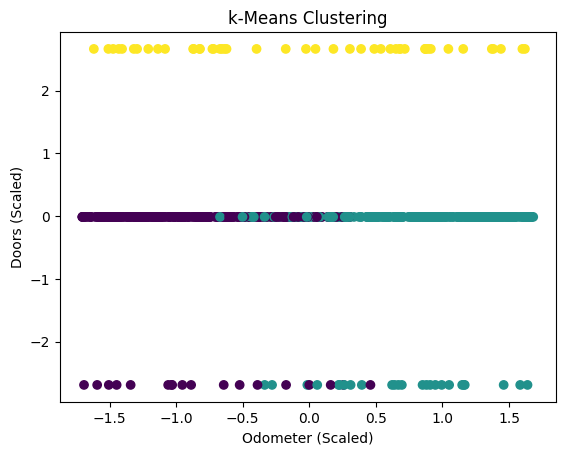

In [106]:
# Application of k‐MEANS CLUSTERING

df = dataset.dropna()

#Select relevant features for clustering (you can customize this based on your needs)
features = df[['Odometer (KM)', 'Doors', 'Price']]

#Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#Choose the number of clusters (you can adjust this based on your problem)
num_clusters = 3

#Apply k-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

#Display the resulting clusters
print(df[['Odometer (KM)', 'Doors', 'Price', 'Cluster']])

#Visualize the clusters (for 2D data)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('k-Means Clustering')
plt.xlabel('Odometer (Scaled)')
plt.ylabel('Doors (Scaled)')
plt.show()

In [107]:
# Estimation Model Evaluation

df = dataset.dropna()

#Define features and target variable
X = df[['Odometer (KM)', 'Doors']]
y = df['Price']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Display the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 6481.68
Mean Squared Error: 65356076.78
R-squared: 0.22


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Demonstrate How you will Identify Multicollinearity

df = dataset.dropna()

#Define features
X = df[['Odometer (KM)', 'Doors', 'Price']]

#Add a constant term for the intercept
X = sm.add_constant(X)

#Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Variable         VIF
0          const  119.172562
1  Odometer (KM)    1.238395
2          Doors    1.076008
3          Price    1.320500


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Demonstrate HOW you’ll apply PRINCIPAL COMPONENTS ANALYSIS

df = dataset.dropna()

#Define features
features = df[['Odometer (KM)', 'Doors', 'Price']]

#Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_scaled)

#Create a DataFrame to visualize the results
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

#Display the principal components DataFrame
print(pc_df.head())

#Percentage of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

#Cumulative variance explained
cumulative_variance_ratio = explained_variance_ratio.cumsum()
print("Cumulative Variance Explained:", cumulative_variance_ratio)

        PC1       PC2       PC3
0  0.740966 -2.660571  0.000674
1  1.394745  0.692681 -0.128624
2 -0.922663 -0.231771 -0.351389
3  1.549944  0.641727  0.179950
4 -0.321666 -0.233944  0.335818
Explained Variance Ratios: [0.5039607  0.32487406 0.17116523]
Cumulative Variance Explained: [0.5039607  0.82883477 1.        ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# New Section

In [20]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving credit_record.csv to credit_record.csv


In [21]:
cdata = pd.read_csv("credit_record.csv")
creditData = cdata[:8000]
print(creditData.head)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.head of            ID  MONTHS_BALANCE STATUS
0     5001711               0      X
1     5001711              -1      0
2     5001711              -2      0
3     5001711              -3      0
4     5001712               0      C
...       ...             ...    ...
7995  5002076              -8      X
7996  5002076              -9      X
7997  5002076             -10      X
7998  5002077               0      X
7999  5002077              -1      X

[8000 rows x 3 columns]>


In [22]:
# Partition the Data

X = creditData[['ID', 'MONTHS_BALANCE']]
y = creditData['STATUS']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

           ID  MONTHS_BALANCE
1467  5001786             -15
5768  5001989              -6
5714  5001988              -5
1578  5001790               0
6958  5002031             -11
...       ...             ...
5226  5001960             -29
5390  5001967             -24
860   5001748             -21
7603  5002055             -20
7270  5002042             -23

[6400 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Balance the Training Data Set

X = creditData[['ID', 'MONTHS_BALANCE']]
y = creditData['STATUS']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Use Random Over-Sampling to balance the training dataset
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
print(X_train_resampled)

           ID  MONTHS_BALANCE
0     5001786             -15
1     5001989              -6
2     5001988              -5
3     5001790               0
4     5002031             -11
...       ...             ...
9927  5001848             -23
9928  5001893             -12
9929  5002055             -24
9930  5001847              -9
9931  5001996             -17

[9932 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.904375
Confusion Matrix:
 [[439   8  17  51]
 [  8   3   0   0]
 [ 15   2 599   3]
 [ 48   1   0 406]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       515
           1       0.21      0.27      0.24        11
           C       0.97      0.97      0.97       619
           X       0.88      0.89      0.89       455

    accuracy                           0.90      1600
   macro avg       0.73      0.75      0.74      1600
weighted avg       0.91      0.90      0.91      1600



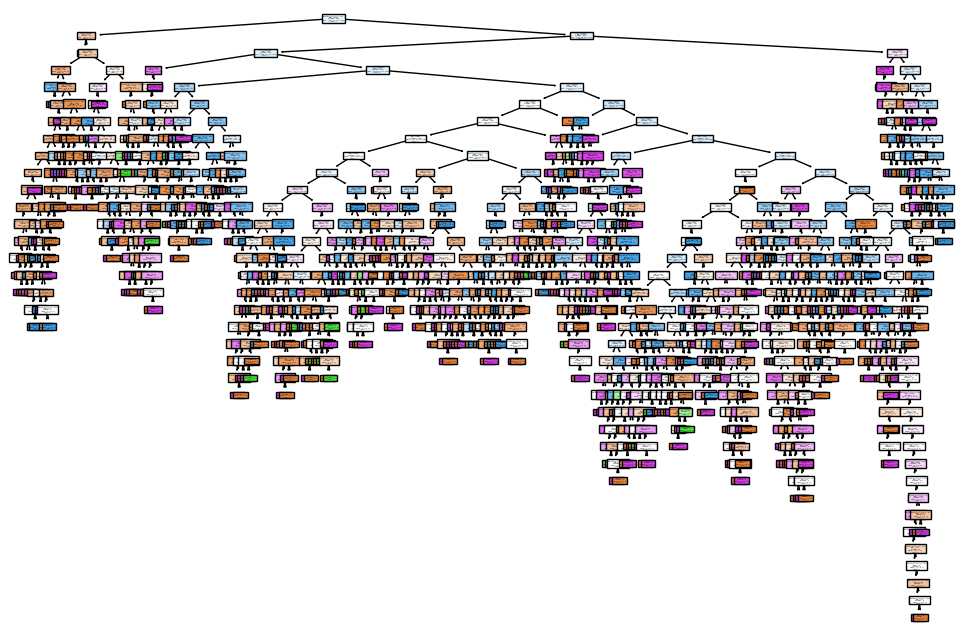

In [24]:
# Build CART Decision Trees

X = creditData[['ID', 'MONTHS_BALANCE']]
y = creditData['STATUS']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

#Train the model
tree_classifier.fit(X_train, y_train)

#Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=tree_classifier.classes_)
plt.show()

In [25]:
# Build Random Forests

X = creditData[['ID', 'MONTHS_BALANCE']]
y = creditData['STATUS']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model
rf_classifier.fit(X_train, y_train)

#Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.598125
Confusion Matrix:
 [[271   4 159  81]
 [  8   1   1   1]
 [127   2 406  84]
 [ 78   1  97 279]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.54       515
           1       0.12      0.09      0.11        11
           C       0.61      0.66      0.63       619
           X       0.63      0.61      0.62       455

    accuracy                           0.60      1600
   macro avg       0.48      0.47      0.48      1600
weighted avg       0.60      0.60      0.60      1600



In [26]:
# Perform Logistic Regression

X = cdata[['MONTHS_BALANCE']]  #Features
y = cdata['STATUS']  #Target variable

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the logistic regression model
model = LogisticRegression()

#Train the model
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill

Accuracy: 0.46120687599837873
Confusion Matrix:
 [[32234     0     0     0     0     0 44547     0]
 [  920     0     0     0     0     0  1230     0]
 [   85     0     0     0     0     0    78     0]
 [   29     0     0     0     0     0    33     0]
 [   23     0     0     0     0     0    29     0]
 [  117     0     0     0     0     0   249     0]
 [23490     0     0     0     0     0 64488     0]
 [15887     0     0     0     0     0 26276     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.42      0.43     76781
           1       0.00      0.00      0.00      2150
           2       0.00      0.00      0.00       163
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        52
           5       0.00      0.00      0.00       366
           C       0.47      0.73      0.57     87978
           X       0.00      0.00      0.00     42163

    accuracy                  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Perform Poisson Regression

cdata['COUNT'] = 1  #Creating a count variable for each observation
X = cdata[['MONTHS_BALANCE']]  #Features
y = cdata['COUNT']  #Target variable

#Fit Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

print(poisson_model.summary())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  COUNT   No. Observations:              1048575
Model:                            GLM   Df Residuals:                  1048574
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0486e+06
Date:                Tue, 26 Dec 2023   Deviance:                       0.0000
Time:                        15:28:02   Pearson chi2:                     0.00
No. Iterations:                     1   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
MONTHS_BALANCE          0   4.12e-05        

# New Section

In [15]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving Bakery.csv to Bakery.csv


In [16]:
sdata = pd.read_csv("Bakery.csv")
shopData=sdata[:8000]
print(shopData)

      TransactionNo           Items             DateTime    Daypart  DayType
0                 1           Bread  2016-10-30 09:58:11    Morning  Weekend
1                 2    Scandinavian  2016-10-30 10:05:34    Morning  Weekend
2                 2    Scandinavian  2016-10-30 10:05:34    Morning  Weekend
3                 3   Hot chocolate  2016-10-30 10:07:57    Morning  Weekend
4                 3             Jam  2016-10-30 10:07:57    Morning  Weekend
...             ...             ...                  ...        ...      ...
7995           4011  Jammie Dodgers  2016-12-30 13:43:23  Afternoon  Weekday
7996           4011           Bread  2016-12-30 13:43:23  Afternoon  Weekday
7997           4012            Coke  2016-12-30 13:45:32  Afternoon  Weekday
7998           4012        Sandwich  2016-12-30 13:45:32  Afternoon  Weekday
7999           4013       Medialuna  2016-12-30 13:46:43  Afternoon  Weekday

[8000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
#  Mine Association Rules

transactions = shopData.groupby('TransactionNo')['Items'].apply(list).values.tolist()

#Convert the transaction data into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

#Use Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

#Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print(rules)

          antecedents consequents  antecedent support  consequent support  \
0         (Alfajores)    (Coffee)            0.043700            0.472016   
1           (Brownie)    (Coffee)            0.048812            0.472016   
2              (Cake)    (Coffee)            0.064912            0.472016   
3           (Cookies)    (Coffee)            0.040378            0.472016   
4     (Hot chocolate)    (Coffee)            0.061078            0.472016   
5  (Keeping It Local)    (Coffee)            0.016100            0.472016   
6         (Medialuna)    (Coffee)            0.088168            0.472016   
7            (Pastry)    (Coffee)            0.090212            0.472016   
8          (Sandwich)    (Coffee)            0.054434            0.472016   
9             (Toast)    (Coffee)            0.016356            0.472016   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.023256    0.532164  1.127426  0.002628    1.128565       0.118189  
1  0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Apply the Confidence Difference Criterion

transactions = shopData.groupby('TransactionNo')['Items'].apply(list).values.tolist()

#Convert the transaction data into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

#Use Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

#Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

#Apply Confidence Difference Criterion
min_confidence_diff = 0.1

#Calculate confidence differences
rules['confidence_diff'] = rules.apply(lambda row: row['confidence'] - row['antecedent support'], axis=1)

#Filter rules based on the confidence difference criterion
filtered_rules = rules[rules['confidence_diff'] >= min_confidence_diff]

print(filtered_rules)

          antecedents consequents  antecedent support  consequent support  \
0         (Alfajores)    (Coffee)            0.043700            0.472016   
1           (Brownie)    (Coffee)            0.048812            0.472016   
2              (Cake)    (Coffee)            0.064912            0.472016   
3           (Cookies)    (Coffee)            0.040378            0.472016   
4     (Hot chocolate)    (Coffee)            0.061078            0.472016   
5  (Keeping It Local)    (Coffee)            0.016100            0.472016   
6         (Medialuna)    (Coffee)            0.088168            0.472016   
7            (Pastry)    (Coffee)            0.090212            0.472016   
8          (Sandwich)    (Coffee)            0.054434            0.472016   
9             (Toast)    (Coffee)            0.016356            0.472016   

    support  confidence      lift  leverage  conviction  zhangs_metric  \
0  0.023256    0.532164  1.127426  0.002628    1.128565       0.118189   
1  0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Apply the Confidence Quotient Criterion

transactions = shopData.groupby('TransactionNo')['Items'].apply(list).values.tolist()

#Convert the transaction data into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

#Use Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

#Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

#Apply Confidence Quotient Criterion
min_confidence_quotient = 1.5

#Calculate confidence quotient
rules['confidence_quotient'] = rules['confidence'] / rules['antecedent support']

#Filter rules based on the confidence quotient criterion
filtered_rules = rules[rules['confidence_quotient'] >= min_confidence_quotient]

print(filtered_rules)

          antecedents consequents  antecedent support  consequent support  \
0         (Alfajores)    (Coffee)            0.043700            0.472016   
1           (Brownie)    (Coffee)            0.048812            0.472016   
2              (Cake)    (Coffee)            0.064912            0.472016   
3           (Cookies)    (Coffee)            0.040378            0.472016   
4     (Hot chocolate)    (Coffee)            0.061078            0.472016   
5  (Keeping It Local)    (Coffee)            0.016100            0.472016   
6         (Medialuna)    (Coffee)            0.088168            0.472016   
7            (Pastry)    (Coffee)            0.090212            0.472016   
8          (Sandwich)    (Coffee)            0.054434            0.472016   
9             (Toast)    (Coffee)            0.016356            0.472016   

    support  confidence      lift  leverage  conviction  zhangs_metric  \
0  0.023256    0.532164  1.127426  0.002628    1.128565       0.118189   
1  0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
